## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [18]:
#Read 
file = 'boc_30s/data_30s_only_9.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(2673, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.985963,16.988277,6.152028,0.234508,0.104749,54.934834,111.080116,4.672720,4.311407,22.171335,...,1.935214,0.825875,0.671964,0.650649,0.601438,0.614866,0.230020,434.193115,0.894006,suaraarchive
1,0.981879,16.154875,7.029408,0.248749,0.129977,139.366715,373.698608,6.428804,7.328341,24.018057,...,2.261895,0.816613,0.467872,0.477233,0.485559,0.560867,0.263837,434.193115,0.917605,suaraarchive
2,0.987341,17.704046,5.994382,0.221113,0.102747,61.243366,91.167221,5.480647,4.225255,16.820066,...,2.214764,0.626813,0.407111,0.422130,0.442967,0.613699,0.240900,434.193115,0.956878,suaraarchive
3,0.988173,18.196672,5.676707,0.250346,0.116325,131.642410,197.429703,7.458259,6.250255,25.070768,...,2.151182,0.751411,0.538804,0.536238,0.531833,0.583113,0.253850,434.193115,0.934906,suaraarchive
4,0.974610,16.868780,5.965635,0.272079,0.128965,67.502502,97.909622,5.588888,4.365337,18.521112,...,2.586561,0.888847,0.626011,0.628222,0.619442,0.556919,0.238008,434.193115,0.894724,suaraarchive


In [19]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

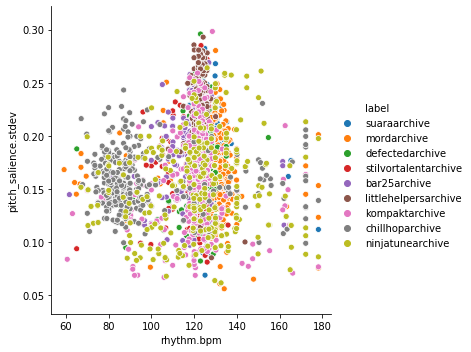

In [20]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

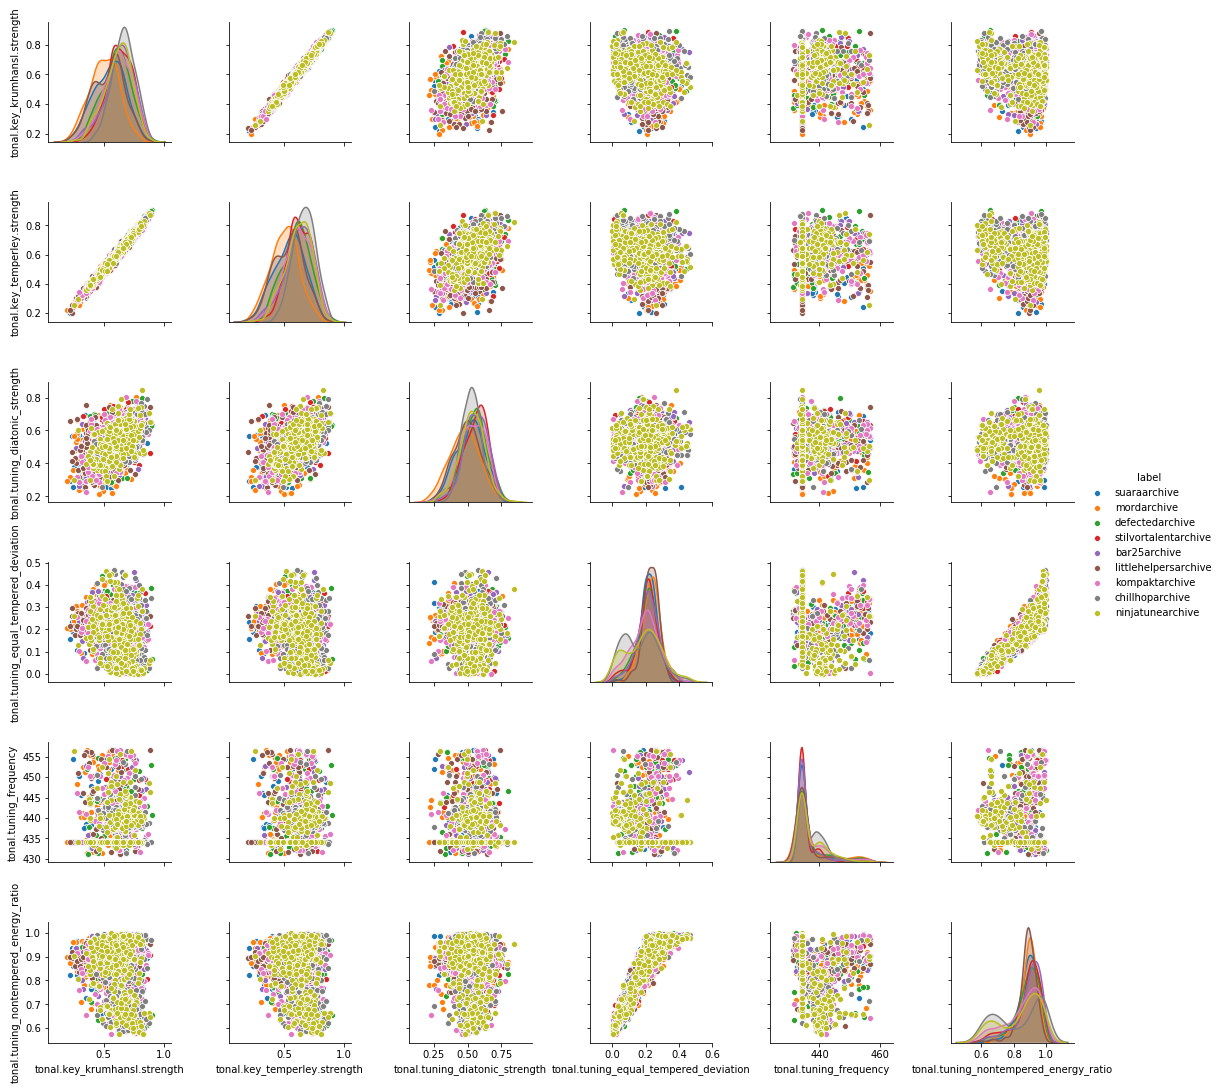

In [21]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [22]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,...,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,0.912029,15.173111,5.610509,0.247495,0.099980,59.269796,123.960916,4.104556,3.780002,16.647255,...,5.695081,2.148684,0.722049,0.597059,0.597226,0.593550,0.530761,0.207742,436.680496,0.872173
std,0.168069,2.881190,1.076958,0.073669,0.034155,63.899208,165.996617,1.972050,2.014651,8.803636,...,1.152825,0.359884,0.096426,0.125477,0.125913,0.124251,0.098435,0.079112,4.934569,0.095524
min,0.001562,4.632785,1.966245,0.043752,0.017622,-0.639596,0.784950,-0.812430,0.382763,1.398662,...,2.928567,0.744395,0.388070,0.198321,0.199921,0.200420,0.215167,0.000433,431.193909,0.574648
25%,0.939157,13.284599,4.911658,0.196181,0.076761,19.041389,35.740879,2.694356,2.339801,10.081326,...,4.834611,1.903067,0.656526,0.515780,0.515931,0.511487,0.469118,0.168046,434.193115,0.837519
50%,0.974950,15.275091,5.641794,0.239874,0.097419,40.683002,79.327545,3.897663,3.441505,15.461256,...,5.480709,2.128037,0.725022,0.610843,0.608197,0.601152,0.535355,0.216147,434.193115,0.897460
75%,0.984534,17.199709,6.356226,0.291058,0.119991,75.249001,155.597778,5.252644,4.829288,21.753750,...,6.350650,2.391480,0.783423,0.684012,0.686800,0.686825,0.599409,0.256326,437.718536,0.938840
max,0.990343,23.036255,8.837737,0.597628,0.254839,645.803650,4071.830078,14.290599,19.029650,69.996796,...,11.006345,3.627443,1.115771,0.898620,0.900005,0.903829,0.844681,0.466130,456.570251,0.999594




### Preprocessing of the features

**Normalisation of the features**

In [23]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [24]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,...,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,0.920797,0.572736,0.530345,0.367850,0.347184,0.092675,0.030257,0.325563,0.182188,0.222289,...,0.342485,0.487085,0.458951,0.569383,0.567511,0.558892,0.501330,0.445159,0.216209,0.700148
std,0.169976,0.156557,0.156728,0.133006,0.143984,0.098847,0.040775,0.130573,0.108042,0.128336,...,0.142716,0.124827,0.132508,0.179176,0.179854,0.176641,0.156367,0.169878,0.194455,0.224790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.948232,0.470119,0.428642,0.275204,0.249304,0.030445,0.008586,0.232191,0.104953,0.126573,...,0.235961,0.401891,0.368910,0.453319,0.451388,0.442228,0.403409,0.359919,0.118189,0.618598
50%,0.984432,0.578277,0.534898,0.354090,0.336387,0.063923,0.019293,0.311864,0.164035,0.205000,...,0.315946,0.479924,0.463037,0.589066,0.583182,0.569699,0.508627,0.463209,0.118189,0.759652
75%,0.994124,0.682856,0.638869,0.446501,0.431541,0.117394,0.038028,0.401580,0.238459,0.296729,...,0.423642,0.571300,0.543291,0.693549,0.695458,0.691497,0.610380,0.549485,0.257115,0.857030
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data_modif.label.value_counts()

mordarchive             297
ninjatunearchive        297
littlehelpersarchive    297
stilvortalentarchive    297
defectedarchive         297
bar25archive            297
chillhoparchive         297
suaraarchive            297
kompaktarchive          297
Name: label, dtype: int64

In [12]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99782457 0.80969166 0.36012134 ... 0.55764355 0.11818908 0.80662499]
 [0.97776015 0.53504204 0.73713711 ... 0.42566172 0.11818908 0.67235846]
 [0.97120819 0.51020532 0.67686843 ... 0.2931257  0.11818908 0.50734165]
 ...
 [0.99228497 0.47058953 0.5748333  ... 0.28608174 0.43739387 0.59917476]
 [0.83034087 0.64531102 0.4781069  ... 0.24878606 0.25711458 0.52502277]
 [0.98600923 0.60155436 0.21116371 ... 0.42226794 0.11818908 0.88573157]]
Class of the first sample:  8


In [13]:
print(y)
print(y.shape)


[8 8 8 ... 3 3 3]
(2547,)


In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=110)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(110,'Score'))  #print k best features

                                      Specs       Score
49                  silence_rate_60dB.stdev  135.534350
45                  silence_rate_20dB.stdev  102.710006
19                  erbbands_kurtosis.stdev   86.662288
75                   spectral_rolloff.stdev   66.376858
41                    melbands_spread.stdev   66.262264
..                                      ...         ...
108                  tonal.tuning_frequency    5.218544
89   rhythm.bpm_histogram_first_peak_weight    4.866317
54                   spectral_decrease.mean    2.472726
0                          average_loudness    1.181010
44                   silence_rate_20dB.mean    0.836768

[110 rows x 2 columns]


In [15]:
X_new = bestfeatures.fit_transform(x, y)

In [16]:
print ( X_new.shape)

(2547, 110)


In [17]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [18]:
#All output values: 
print(y)

[8 8 8 ... 6 6 6]


**Splitting data into train and test subsets**

In [19]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [20]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (2138, 110) , Size of train output vector:  (2138,)
Size of test features matrix:  (535, 110) , Size of test output vector:  (535,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

**Testing the model**



In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

In [ ]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

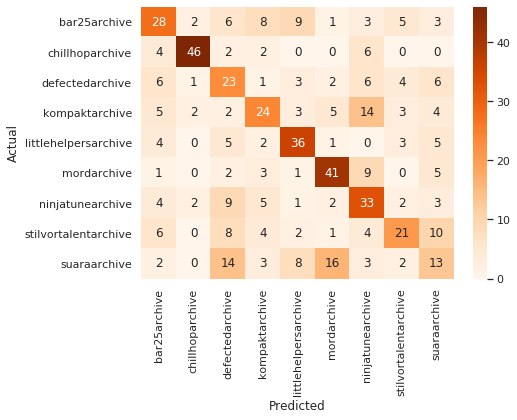

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.43      0.45        65
           1       0.87      0.77      0.81        60
           2       0.32      0.44      0.37        52
           3       0.46      0.39      0.42        62
           4       0.57      0.64      0.61        56
           5       0.59      0.66      0.63        62
           6       0.42      0.54      0.47        61
           7       0.53      0.38      0.44        56
           8       0.27      0.21      0.24        61

    accuracy                           0.50       535
   macro avg       0.50      0.50      0.49       535
weighted avg       0.50      0.50      0.49       535



In [27]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.5046728971962616

## Other ML Frameworks


In [25]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

KeyboardInterrupt: 

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)


#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [23]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (2138, 9)
One-hot encoded y_test shape =  (535, 9)


**Let's define our deep learning architecture**

In [24]:
!pip3 install keras

In [25]:
!pip3 install tensorflow

In [24]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 55))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

Using TensorFlow backend.


You can have a look at the summary of the model

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               12210     
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 55)                6105      
_________________________________________________________________
batch_normalization_2 (Batch (None, 55)               

Let's pick an optimizer, compile the model and train the network

In [26]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0)

Testing the trained model

In [27]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2208876091743184
Test accuracy: 0.5775700807571411


It is a good and common practice to check the learning curves

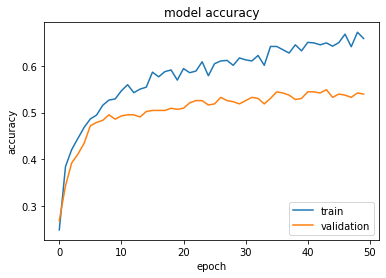

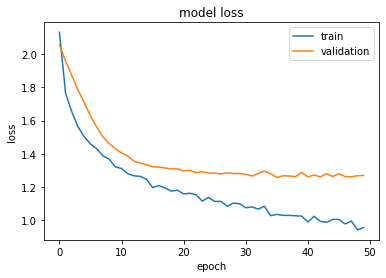

In [28]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [29]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

4366


In [30]:
y_pred = y.argmax(axis=1)

In [31]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.577570093457944

In [32]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.4224299065420561

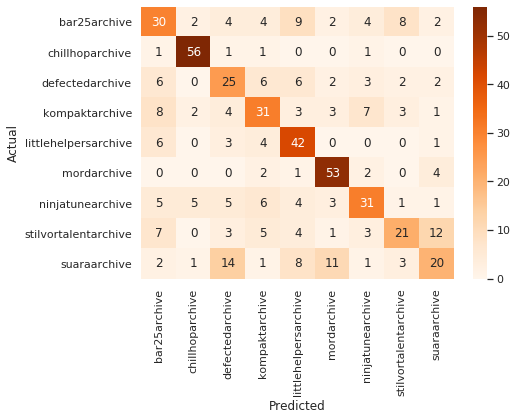

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        65
           1       0.85      0.93      0.89        60
           2       0.42      0.48      0.45        52
           3       0.52      0.50      0.51        62
           4       0.55      0.75      0.63        56
           5       0.71      0.85      0.77        62
           6       0.60      0.51      0.55        61
           7       0.55      0.38      0.45        56
           8       0.47      0.33      0.38        61

    accuracy                           0.58       535
   macro avg       0.57      0.58      0.57       535
weighted avg       0.57      0.58      0.57       535



## PREDICTIONS

## Model Prediction on New Data

In [1]:
model.save("boc_30s/kerasmodel30s.h5")
print("Model Saved")

NameError: name 'model' is not defined